<a href="https://colab.research.google.com/github/Jiayi1827/CS-446/blob/main/JIAYIX8_proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [ ]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install python-utils

In [ ]:
%cd /content/drive/MyDrive/CS 445/Project1/hybrid/

/content/drive/MyDrive/CS 445/Project1/hybrid


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/CS 445/Project1/hybrid')


In [ ]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "/content/drive/MyDrive/CS 445/Project1/hybrid/"

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

cp: '/content/drive/MyDrive/CS 445/Project1/hybrid/utils.py' and './utils.py' are the same file


In [ ]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
im1_file = datadir + 'nutmeg.jpg'
im2_file = datadir + 'DerekPicture.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

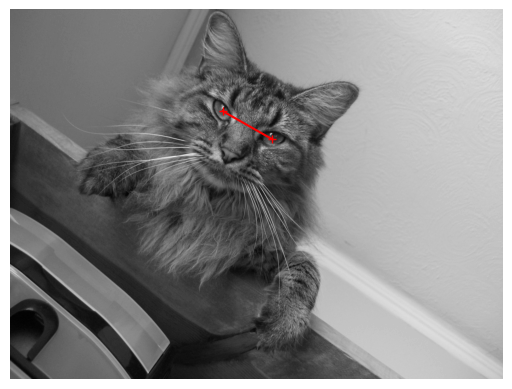

In [ ]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

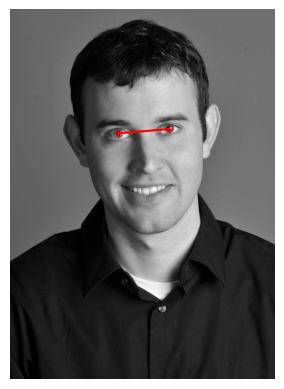

In [ ]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [ ]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [ ]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

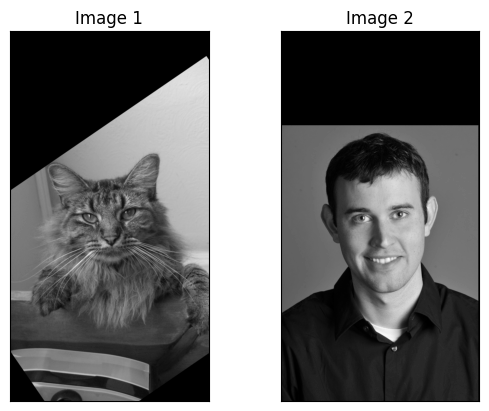

In [ ]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

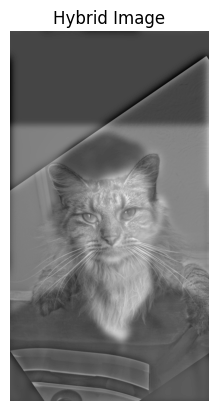

In [ ]:
def create_gaussian_filter(sigma):
    size = im1.shape
    # kernel size
    ksize = int(np.ceil(sigma) * 6 + 1)
    if ksize % 2 == 0:  # ensure ksize is odd
        ksize += 1

    # 1D Gaussian kernel
    gaussian_kernel_1d = cv2.getGaussianKernel(ksize, sigma)

    # 2D Gaussian kernel
    gaussian_kernel_2d = gaussian_kernel_1d * gaussian_kernel_1d.T

    pad_y = (size[0] - ksize) // 2
    pad_x = (size[1] - ksize) // 2
    gaussian_kernel_padded = np.pad(gaussian_kernel_2d, ((pad_y, pad_y), (pad_x, pad_x)), 'constant')

    # shift the kernel to make sure center is at the (0,0) frequency in the FFT output
    gaussian_kernel_shifted = np.fft.fftshift(gaussian_kernel_padded)

    return gaussian_kernel_shifted
def hybridImage(im1, im2, sigma_low, sigma_high):
    # im1 is the cat, im2 is the human

    # gaussian filters
    gaussian_filter_low = create_gaussian_filter(sigma_low)
    gaussian_filter_high = create_gaussian_filter(sigma_high)

    # Fourier transforms, convert to frequency domain
    F1 = np.fft.fft2(im1)
    F2 = np.fft.fft2(im2)

    # Fourier transform of the filters
    G_low = np.fft.fft2(gaussian_filter_low, s=im2.shape)  # Low-pass filter size matches im2 (human)
    G_high = np.fft.fft2(gaussian_filter_high, s=im1.shape)  # High-pass filter size matches im1 (cat)

    # apply filters
    low_pass = F2 * G_low
    high_pass = F1 * (1 - G_high)

    # convert back to spatial domain
    im2_low = np.fft.ifft2(low_pass).real  # low-pass result for human
    im1_high = np.fft.ifft2(high_pass).real  # high-pass result for cat
    hybrid_image = im2_low + im1_high

    # Normalize and convert to uint8
    hybrid_image = cv2.normalize(hybrid_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return hybrid_image, im2_low, im1_high

hybrid_img, im2_low, im1_high = hybridImage(im1, im2, sigma_low=10, sigma_high=15)


plt.imshow(hybrid_img, cmap='gray')
plt.title('Hybrid Image')
plt.axis('off')
plt.show()


### Pair of images 1 (desired result)

In [ ]:
im1_file = datadir + 'ron.jpg'
im2_file = datadir + 'harry.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

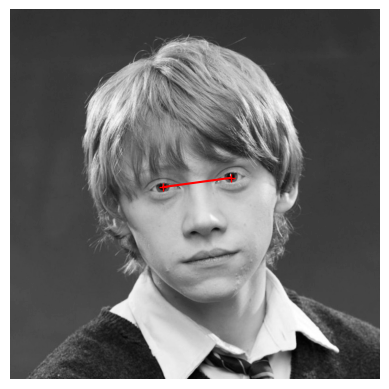

In [ ]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[331,384], [478,364]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')


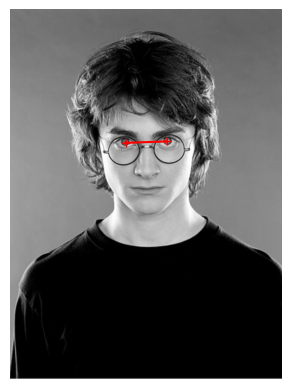

In [ ]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[408,471], [553,466]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [ ]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [ ]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

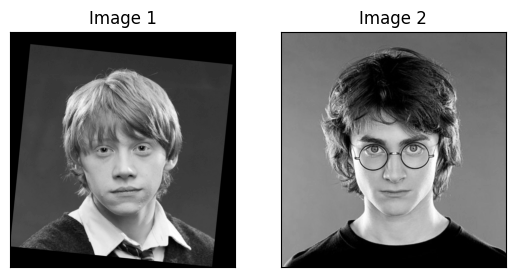

In [ ]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [ ]:
def create_gaussian_filter(sigma):
    size = im1.shape
    # kernel size
    ksize = int(np.ceil(sigma) * 6 + 1)
    if ksize % 2 == 0:  # ensure ksize is odd
        ksize += 1

    # 1D Gaussian kernel
    gaussian_kernel_1d = cv2.getGaussianKernel(ksize, sigma)

    # 2D Gaussian kernel
    gaussian_kernel_2d = gaussian_kernel_1d * gaussian_kernel_1d.T

    pad_y = (size[0] - ksize) // 2
    pad_x = (size[1] - ksize) // 2
    gaussian_kernel_padded = np.pad(gaussian_kernel_2d, ((pad_y, pad_y), (pad_x, pad_x)), 'constant')

    # shift the kernel to make sure center is at the (0,0) frequency in the FFT output
    gaussian_kernel_shifted = np.fft.fftshift(gaussian_kernel_padded)

    return gaussian_kernel_shifted


def hybridImage(im1, im2, sigma_low, sigma_high):
    # gaussian filters
    gaussian_filter_low = create_gaussian_filter(sigma_low)
    gaussian_filter_high = create_gaussian_filter(sigma_high)

    # Fourier transforms, convert to frequency domain
    F1 = np.fft.fft2(im1)
    F2 = np.fft.fft2(im2)

    # Fourier transform of the filters
    G_low = np.fft.fft2(gaussian_filter_low, s=im2.shape)
    G_high = np.fft.fft2(gaussian_filter_high, s=im1.shape)

    # apply filters
    low_pass = F2 * G_low
    high_pass = F1 * (1 - G_high)

    # convert back to spatial domain
    im2_low = np.fft.ifft2(low_pass).real
    im1_high = np.fft.ifft2(high_pass).real
    hybrid_image = im2_low + im1_high

    # Normalize and convert to uint8
    hybrid_image = cv2.normalize(hybrid_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return hybrid_image, im2_low, im1_high

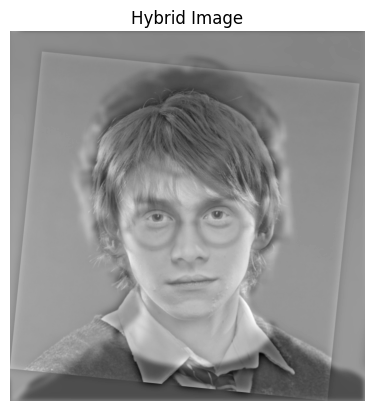

In [ ]:
hybrid_img_desired, im2_low, im1_high = hybridImage(im1, im2, sigma_low=5, sigma_high=10)

plt.imshow(hybrid_img_desired, cmap='gray')
plt.title('Hybrid Image')
plt.axis('off')
plt.show()

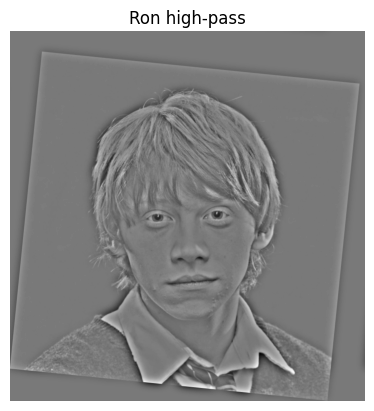

In [ ]:
plt.imshow(im1_high, cmap='gray')
plt.title('Ron high-pass')
plt.axis('off')
plt.show()

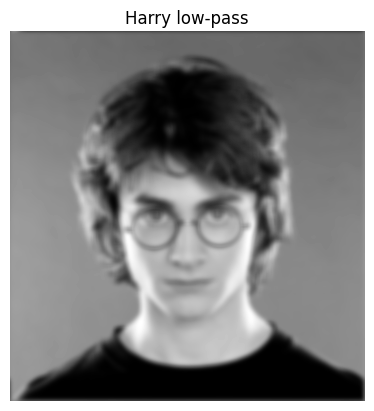

In [ ]:
plt.imshow(im2_low, cmap='gray')
plt.title('Harry low-pass')
plt.axis('off')
plt.show()

In [ ]:
# Display FFT images
def display_fft_image(image, title):
    fftmag = np.abs(np.fft.fftshift(np.fft.fft2(image)))

    plt.figure(figsize=(6, 6))
    plt.imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')
    plt.title(title)
    plt.colorbar()
    plt.show()

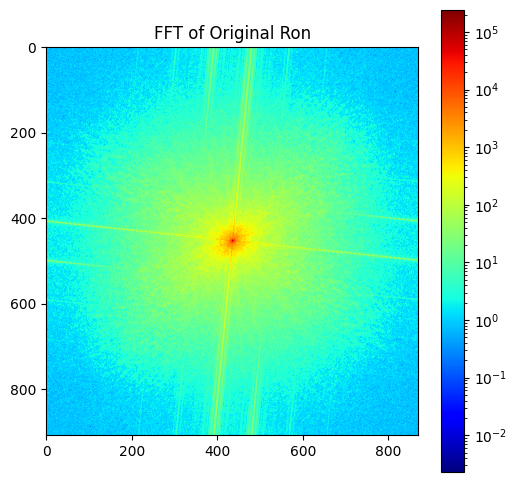

In [ ]:
display_fft_image(im1, "FFT of Original Ron")

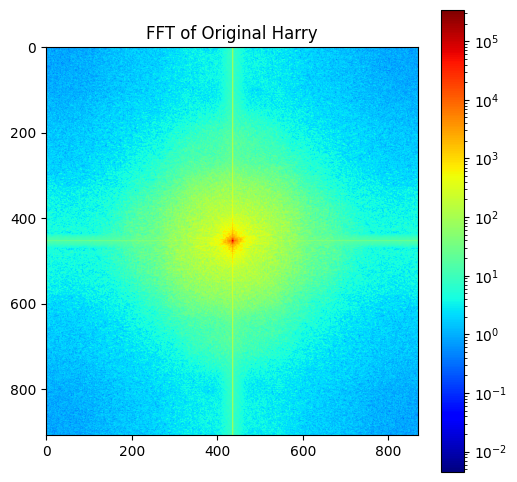

In [ ]:
display_fft_image(im2, "FFT of Original Harry")

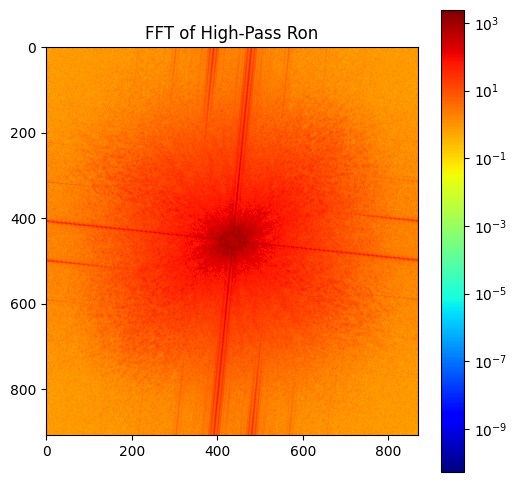

In [ ]:
display_fft_image(im1_high, "FFT of High-Pass Ron")

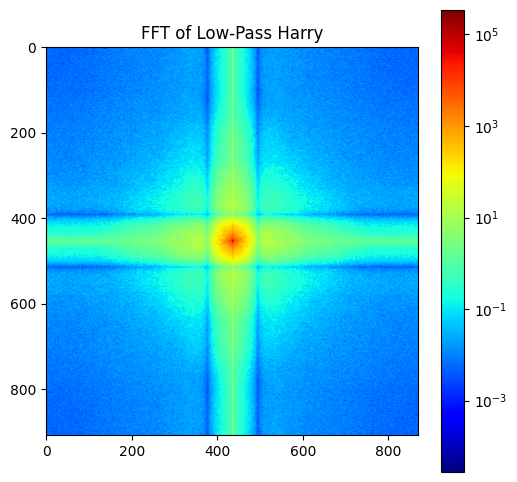

In [ ]:
display_fft_image(im2_low, "FFT of Low-Pass Harry")

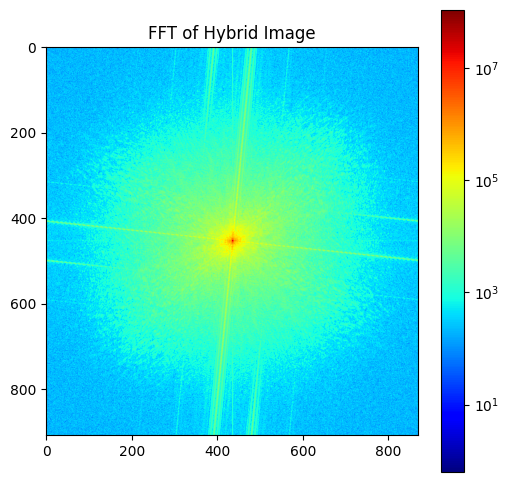

In [ ]:
display_fft_image(hybrid_img_desired, "FFT of Hybrid Image")

### Pair of images 2

In [ ]:
im1_file = datadir + 'cat1.jpg'
im2_file = datadir + 'human1.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

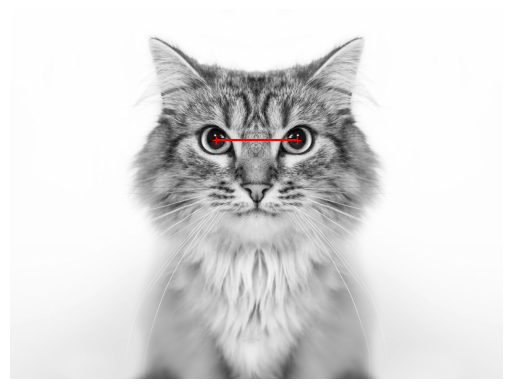

In [ ]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[502, 318], [698, 318]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

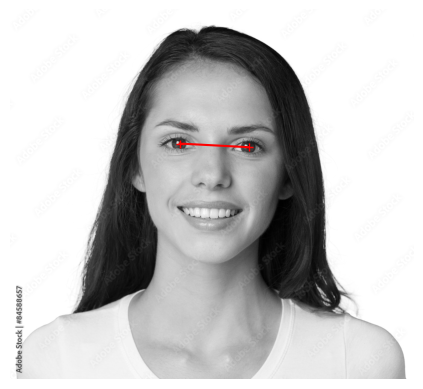

In [ ]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[420,332], [591,341]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')


In [ ]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [ ]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

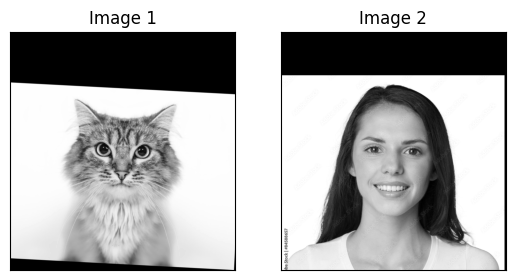

In [ ]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [ ]:
def create_gaussian_filter(sigma):
    size = im1.shape
    # kernel size
    ksize = int(np.ceil(sigma) * 6 + 1)
    if ksize % 2 == 0:  # ensure ksize is odd
        ksize += 1

    # 1D Gaussian kernel
    gaussian_kernel_1d = cv2.getGaussianKernel(ksize, sigma)

    # 2D Gaussian kernel
    gaussian_kernel_2d = gaussian_kernel_1d * gaussian_kernel_1d.T

    pad_y = (size[0] - ksize) // 2
    pad_x = (size[1] - ksize) // 2
    gaussian_kernel_padded = np.pad(gaussian_kernel_2d, ((pad_y, pad_y), (pad_x, pad_x)), 'constant')

    # shift the kernel to make sure center is at the (0,0) frequency in the FFT output
    gaussian_kernel_shifted = np.fft.fftshift(gaussian_kernel_padded)

    return gaussian_kernel_shifted


def hybridImage(im1, im2, sigma_low, sigma_high):
    # gaussian filters
    gaussian_filter_low = create_gaussian_filter(sigma_low)
    gaussian_filter_high = create_gaussian_filter(sigma_high)

    # Fourier transforms, convert to frequency domain
    F1 = np.fft.fft2(im1)
    F2 = np.fft.fft2(im2)

    # Fourier transform of the filters
    G_low = np.fft.fft2(gaussian_filter_low, s=im2.shape)
    G_high = np.fft.fft2(gaussian_filter_high, s=im1.shape)

    # apply filters
    low_pass = F2 * G_low
    high_pass = F1 * (1 - G_high)

    # convert back to spatial domain
    im2_low = np.fft.ifft2(low_pass).real
    im1_high = np.fft.ifft2(high_pass).real
    hybrid_image = im2_low + im1_high

    # Normalize and convert to uint8
    hybrid_image = cv2.normalize(hybrid_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return hybrid_image, im2_low, im1_high

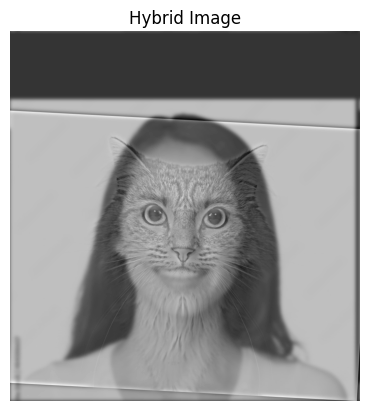

In [ ]:
hybrid_img, im2_low, im1_high = hybridImage(im1, im2, sigma_low=5, sigma_high=6)

plt.imshow(hybrid_img, cmap='gray')
plt.title('Hybrid Image')
plt.axis('off')
plt.show()

### Pair of images 3

In [ ]:
im1_file = datadir + 'cat2.jpg'
im2_file = datadir + 'dog1.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

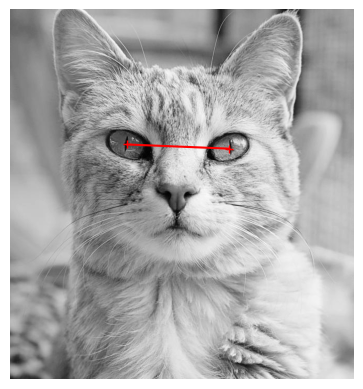

In [ ]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[225,259], [421,267]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

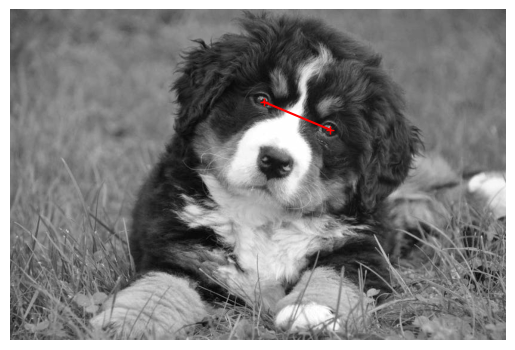

In [ ]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[425,155], [537,202]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')


In [ ]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [ ]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

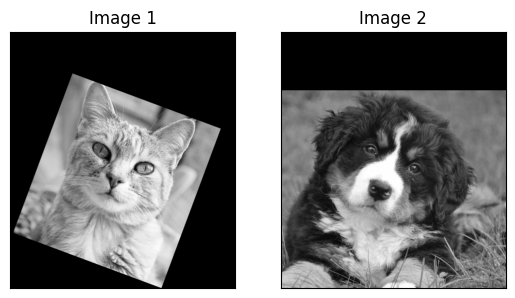

In [ ]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [ ]:
def create_gaussian_filter(sigma):
    size = im1.shape
    # kernel size
    ksize = int(np.ceil(sigma) * 6 + 1)
    if ksize % 2 == 0:  # ensure ksize is odd
        ksize += 1

    # 1D Gaussian kernel
    gaussian_kernel_1d = cv2.getGaussianKernel(ksize, sigma)

    # 2D Gaussian kernel
    gaussian_kernel_2d = gaussian_kernel_1d * gaussian_kernel_1d.T

    pad_y = (size[0] - ksize) // 2
    pad_x = (size[1] - ksize) // 2
    gaussian_kernel_padded = np.pad(gaussian_kernel_2d, ((pad_y, pad_y), (pad_x, pad_x)), 'constant')

    # shift the kernel to make sure center is at the (0,0) frequency in the FFT output
    gaussian_kernel_shifted = np.fft.fftshift(gaussian_kernel_padded)

    return gaussian_kernel_shifted


def hybridImage(im1, im2, sigma_low, sigma_high):
    # gaussian filters
    gaussian_filter_low = create_gaussian_filter(sigma_low)
    gaussian_filter_high = create_gaussian_filter(sigma_high)

    # Fourier transforms, convert to frequency domain
    F1 = np.fft.fft2(im1)
    F2 = np.fft.fft2(im2)

    # Fourier transform of the filters
    G_low = np.fft.fft2(gaussian_filter_low, s=im2.shape)
    G_high = np.fft.fft2(gaussian_filter_high, s=im1.shape)

    # apply filters
    low_pass = F2 * G_low
    high_pass = F1 * (1 - G_high)

    # convert back to spatial domain
    im2_low = np.fft.ifft2(low_pass).real
    im1_high = np.fft.ifft2(high_pass).real
    hybrid_image = im2_low + im1_high

    # Normalize and convert to uint8
    hybrid_image = cv2.normalize(hybrid_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return hybrid_image, im2_low, im1_high

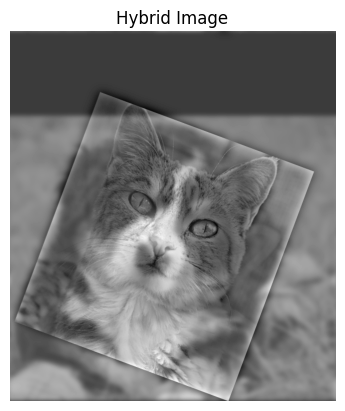

In [ ]:
hybrid_img, im2_low, im1_high = hybridImage(im1, im2, sigma_low=4, sigma_high=8)

plt.imshow(hybrid_img, cmap='gray')
plt.title('Hybrid Image')
plt.axis('off')
plt.show()

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

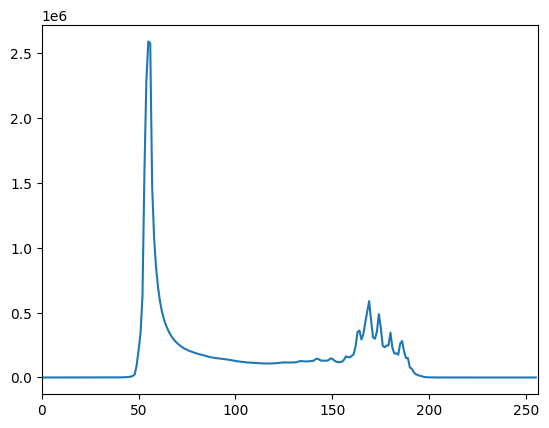

In [ ]:
img = cv2.imread('landscape.jpg', cv2.COLOR_BGR2GRAY)

hist_before = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist_before)
plt.xlim([0, 256])
plt.show()

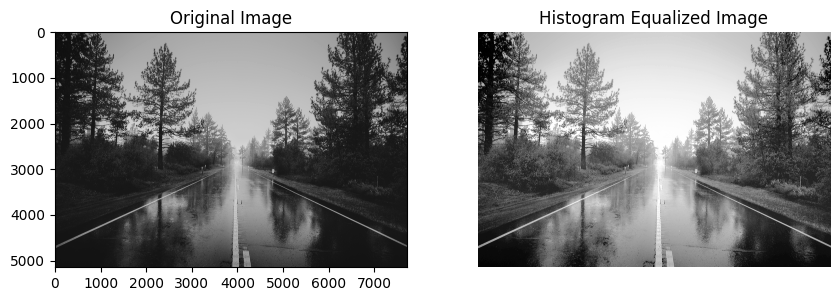

In [ ]:
# Histogram Equalization
image = cv2.imread('landscape.jpg', cv2.IMREAD_GRAYSCALE)

equalized_image = cv2.equalizeHist(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')
plt.show()


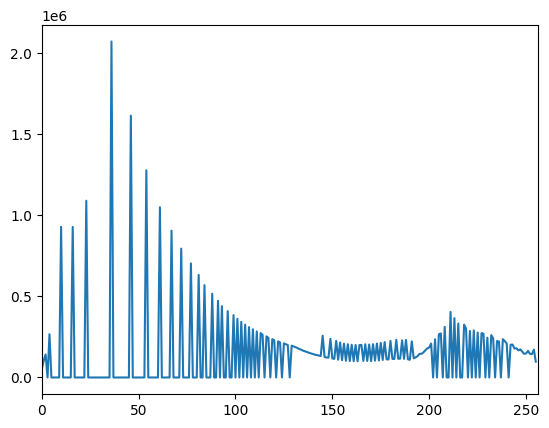

In [ ]:
# After equalization
hist_after = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

plt.plot(hist_after)
plt.xlim([0, 256])
plt.show()

### Color Enhancement

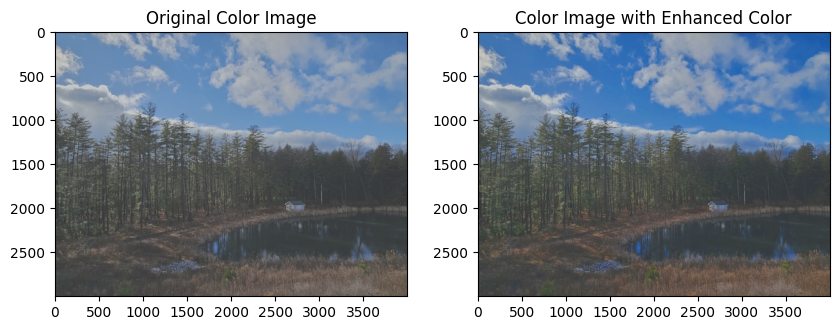

In [ ]:
color_image = cv2.imread('land1.jpg')

# convert to HSV
hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

# split channels
H, S, V = cv2.split(hsv_image)

# enhance the saturation to make the colors more vivid
s_enhanced = np.clip(S * 1.5, 0, 255).astype(S.dtype)  # Scale and clip saturation values

# merge the enhanced s channel back with the original h and v channels
hsv_enhanced = cv2.merge((H, s_enhanced, V))

# convert HSV--BGR--RGB
enhanced_color_image = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2BGR)
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
enhanced_color_image_rgb = cv2.cvtColor(enhanced_color_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(color_image_rgb)
plt.title('Original Color Image')
plt.subplot(1, 2, 2)
plt.imshow(enhanced_color_image_rgb)
plt.title('Color Image with Enhanced Color')
plt.show()

### Color shift

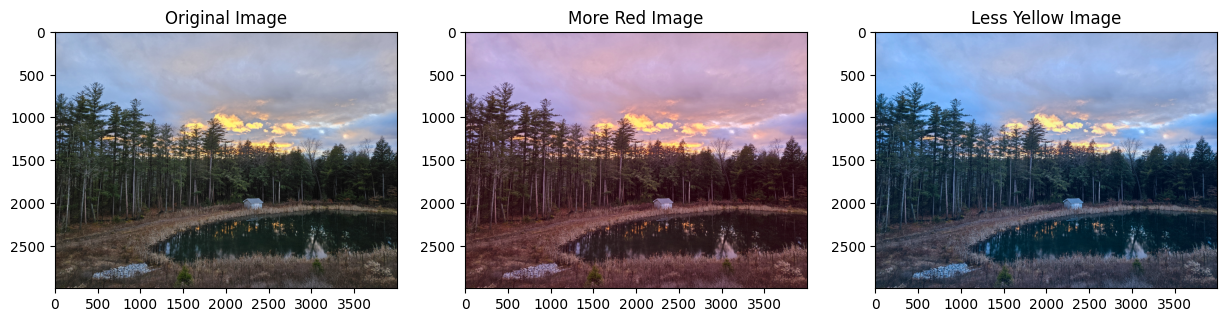

In [ ]:
image_color = cv2.imread('land2.jpg')

image_lab = cv2.cvtColor(image_color, cv2.COLOR_BGR2Lab)

# Split into L, A, and B channels
l, a, b = cv2.split(image_lab)

# More red (increase 'a' channel)
more_red = a + 15
more_red = np.clip(more_red, 0, 255)  # ensure values stay in the 0-255 range
more_red_image = cv2.merge([l, more_red, b])  # merge back with other channels, luminance channel is always 1
more_red_image = cv2.cvtColor(more_red_image, cv2.COLOR_Lab2BGR)

# Less yellow (decrease 'b' channel)
less_yellow = b - 15
less_yellow = np.clip(less_yellow, 0, 255)
less_yellow_image = cv2.merge([l, a, less_yellow])
less_yellow_image = cv2.cvtColor(less_yellow_image, cv2.COLOR_Lab2BGR)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(more_red_image, cv2.COLOR_BGR2RGB))
plt.title('More Red Image')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(less_yellow_image, cv2.COLOR_BGR2RGB))
plt.title('Less Yellow Image')
plt.show()


### Bells & Whistles (Extra Points)

Try using color to enhance the effect of hybrid images. Does it work better to use color for the high-frequency component, the low-frequency component, or both? (5 pts)

Illustrate the hybrid image process by implementing Gaussian and Laplacian pyramids and displaying them for your favorite result. This should look similar to Figure 7 in the Oliva et al. paper. (15 pts)

Do all three image enhancement tasks. (10 pts)

1. Try using color to enhance the effect of hybrid images. Does it work better to use color for the high-frequency component, the low-frequency component, or both? (5 pts)

In [ ]:
im1_file = datadir + 'ron.jpg'
im2_file = datadir + 'harry.jpg'

im1 = cv2.cvtColor(cv2.imread(im1_file), cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(cv2.imread(im2_file), cv2.COLOR_BGR2RGB)

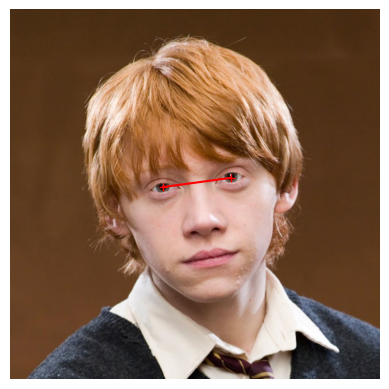

In [ ]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[331,384], [478,364]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')


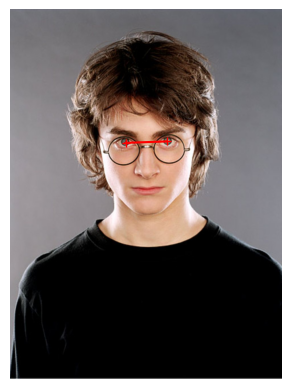

In [ ]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[408,471], [553,466]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [ ]:
im1, im2 = utils.align_images(im1_file, im2_file, pts_im1, pts_im2, save_images=False)


In [ ]:
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) / 255.0

(Text(0.5, 1.0, 'Image 2'), [], [])

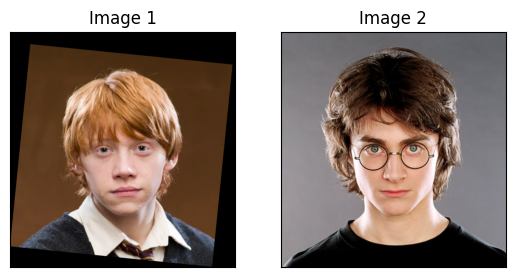

In [ ]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1)
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2)
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])

In [ ]:
def create_gaussian_filter(sigma):
    size = im1.shape
    # kernel size
    ksize = int(np.ceil(sigma) * 6 + 1)
    if ksize % 2 == 0:  # ensure ksize is odd
        ksize += 1

    # 1D Gaussian kernel
    gaussian_kernel_1d = cv2.getGaussianKernel(ksize, sigma)

    # 2D Gaussian kernel
    gaussian_kernel_2d = gaussian_kernel_1d * gaussian_kernel_1d.T

    pad_y = (size[0] - ksize) // 2
    pad_x = (size[1] - ksize) // 2
    gaussian_kernel_padded = np.pad(gaussian_kernel_2d, ((pad_y, pad_y), (pad_x, pad_x)), 'constant')

    # shift the kernel to make sure center is at the (0,0) frequency in the FFT output
    gaussian_kernel_shifted = np.fft.fftshift(gaussian_kernel_padded)

    return gaussian_kernel_shifted


In [ ]:
def hybridImage(im1, im2, sigma_low, sigma_high):


    # Create Gaussian filters
    gaussian_filter_low = create_gaussian_filter(sigma_low)
    gaussian_filter_high = create_gaussian_filter(sigma_high)


    hybrid_image_channels = []
    im2_low_channels = []
    im1_high_channels = []

    for c in range(3):
        # fourier transform (frequency domain)
        F1 = np.fft.fft2(im1[:, :, c])
        F2 = np.fft.fft2(im2[:, :, c])

        G_low = np.fft.fft2(gaussian_filter_low, s=im2.shape[:2])
        G_high = np.fft.fft2(gaussian_filter_high, s=im1.shape[:2])

        # apply filters
        low_pass = F2 * G_low
        high_pass = F1 * (1 - G_high)

        # Convert back to spatial domain
        im2_low = np.fft.ifft2(low_pass).real
        im1_high = np.fft.ifft2(high_pass).real

        # append results for each channel
        im2_low_channels.append(im2_low)
        im1_high_channels.append(im1_high)

        hybrid_channel = im2_low + im1_high
        hybrid_image_channels.append(hybrid_channel)

    # stack the channels back together
    hybrid_image = np.stack(hybrid_image_channels, axis=-1)
    im2_low = np.stack(im2_low_channels, axis=-1)
    im1_high = np.stack(im1_high_channels, axis=-1)


    # Normalize and convert to uint8
    # hybrid_image = cv2.normalize(hybrid_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    # im2_low = cv2.normalize(im2_low, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    # im1_high = cv2.normalize(im1_high, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return hybrid_image, im2_low, im1_high


In [ ]:
hybrid_image, im2_low, im1_high = hybridImage(im1, im2, sigma_low=5, sigma_high=10)

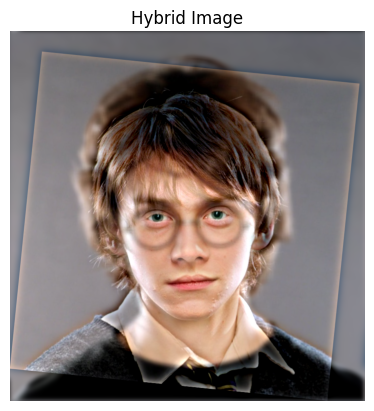

In [ ]:
hybrid_image = np.clip(hybrid_image, 0.0, 1.0)

plt.imshow(hybrid_image)
plt.title('Hybrid Image')
plt.axis('off')
plt.show()

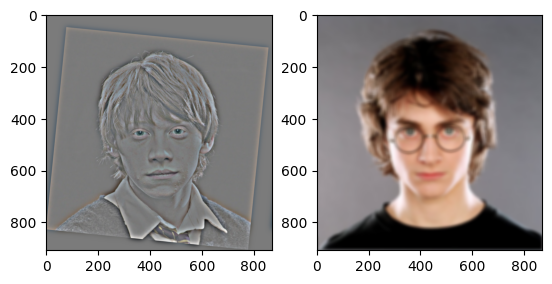

In [ ]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(im1_high)
axes[1].imshow(im2_low)

2. Illustrate the hybrid image process by implementing Gaussian and Laplacian pyramids and displaying them for your favorite result. This should look similar to Figure 7 in the Oliva et al. paper. (15 pts)


In [ ]:
hybrid_img_desired # The image I got from desired result in Part 1

array([[134, 137, 140, ..., 128, 131, 131],
       [135, 138, 140, ..., 130, 132, 132],
       [136, 138, 140, ..., 131, 133, 133],
       ...,
       [133, 136, 140, ..., 125, 128, 129],
       [133, 137, 140, ..., 126, 130, 130],
       [133, 137, 140, ..., 126, 130, 130]], dtype=uint8)

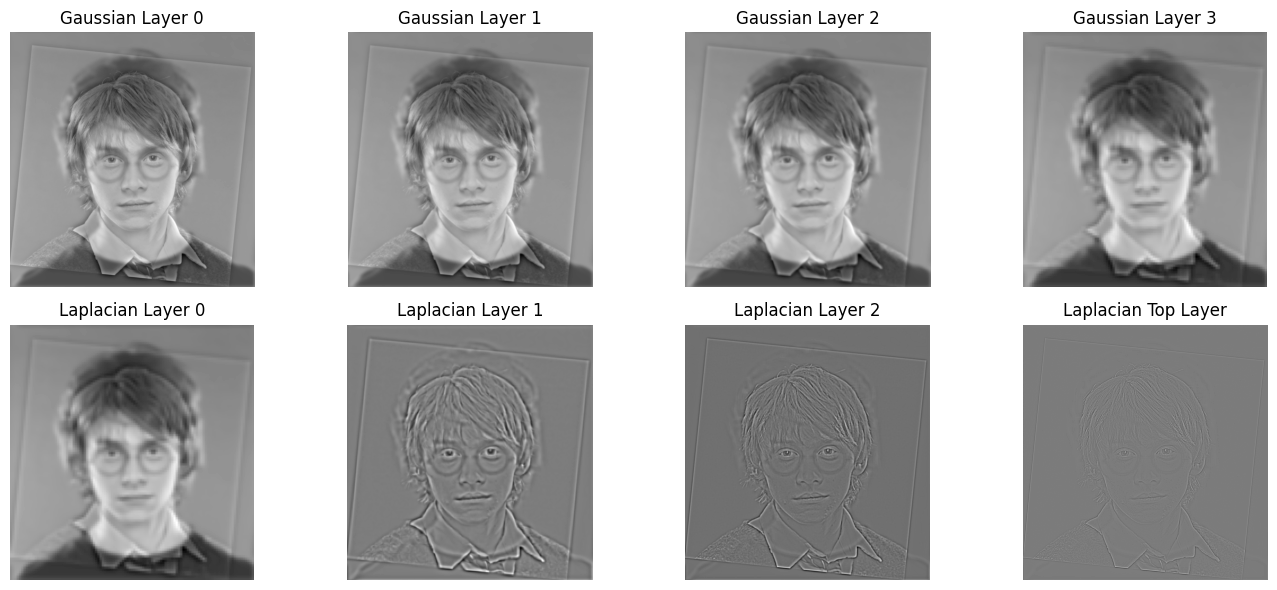

In [ ]:
# normalized to [0, 1] range
hybrid_img_desired = hybrid_img_desired.astype(np.float32) / 255.0

# gaussian pyramid
gaussian_pyramid = [hybrid_img_desired]  # Start with the original image
for i in range(3):
    gaussian_layer = cv2.pyrDown(gaussian_pyramid[-1])  # get the next layer
    gaussian_pyramid.append(gaussian_layer)  # append to the pyramid list

# laplacian pyramid
laplacian_pyramid = [gaussian_pyramid[-1]]  # top level is the smallest gaussian layer
for i in range(3, 0, -1):  # iterate 3 times
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=(gaussian_pyramid[i - 1].shape[1], gaussian_pyramid[i - 1].shape[0]))
    laplacian_layer = cv2.subtract(gaussian_pyramid[i - 1], gaussian_expanded)  # subtract to get the Laplacian layer
    laplacian_pyramid.append(laplacian_layer)  # append to the pyramid list

fig, axes = plt.subplots(2, 4, figsize=(14, 6))

for i in range(4):
    axes[0, i].imshow(gaussian_pyramid[i], cmap='gray')
    axes[0, i].set_title(f'Gaussian Layer {i}')
    axes[0, i].axis('off')

for i in range(3):
    axes[1, i].imshow(laplacian_pyramid[i], cmap='gray')
    axes[1, i].set_title(f'Laplacian Layer {i}')
    axes[1, i].axis('off')
axes[1, 3].imshow(laplacian_pyramid[3], cmap='gray')
axes[1, 3].set_title('Laplacian Top Layer')
axes[1, 3].axis('off')
plt.tight_layout()
plt.show()


https://stock.adobe.com/images/smiling-human-face-women/84588657 (human)

https://www.countryliving.com/life/kids-pets/g42625508/the-friendliest-cat-breeds-that-make-great-pets/   (cat)

https://bestfriends.org/sanctuary/about-sanctuary/animal-areas/cat-world (cat2)

https://wagwalking.com/wellness/manganese-for-dogs (dog)

https://www.linkedin.com/in/ron-application-engineer/?originalSubdomain=uk (Ron)

https://www.geo.de/geolino/mensch/9704-rtkl-harry-potter-filme-wer-harry-und-hermine-spielt  (harry)

https://archive.org/details/road-landscape-nature-forest-39811 (landscape)

https://www.projectpro.io/recipes/do-laplacian-pyramids-work-opencv (Gaussian and Laplacian pyramids)